# Caracterización de conectividad

Juan Sosa PhD

Email [jcsosam@unal.edu.co](mailto:jcsosam@unal.edu.co)

GitHub https://github.com/jstats1702

Traducción a Python: Samuel H. Sánchez

Email [ssanchezgu@unal.edu.co](mailto:ssanchezgu@unal.edu.co)

GitHub https://github.com/Samuel-col

In [1]:
import igraph as gr
import pandas as pd
import numpy as np
import math as m
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import networkx as nx

## 1. Introducción

La **cohesión** se refiere a la medida en que **subconjuntos de vértices específicos son cohesivos (adherentes)** respecto a la relación que define las aristas.


## 2. *Cliques*

Un enfoque para definir la **cohesión de una red** es mediante la **especificación de subgrafos** de interés.

Un **clan** (*clique*) $C$ de un grafo $G=(V,E)$ es un subconjunto de vértices tal que cada par de vértices distintos son adyacentes, i.e., el subgrafo de $G$ **inducido** por $C$ es un **grafo completo**. 

Clanes de tamaños más grandes incluyen clanes de tamaños más pequeños. 

¿Cuántos clanes?

<p align = "center">
    <img src="05_clique_ejemplo.png" width = 400\>
</p>

In [2]:
g = gr.Graph.Formula("1:2:3:4:5 -- 1:2:3:4:5, 6:7:8 -- 6:7:8, 6 -- 1, 9 -- 2:7:10").simplify()
# Interpretación de la fórmula: 
#  , separa distintos enunciados
#  -- representa uno o varios enlaces
#  : crea conjuntos de vértices
# Por ejemplo, 1:2:3 representa el conjunto de los tres primeros vértices
# Se pueden crear enlaces entre conjuntos de vértices, entonces la expresión 
#  1:2 -- 3:4 indica que todos los nodos del conjunto 1:2 están enlazados
#  con los nodos del conjunto 3:4
# Para más información: help(gr.Graph.Formula)
# Note que estos recursos llevan a la creación de grafos no simples pues
#  1:2 -- 2:3 inplica 2 -- 2, por eso, se simplifica el grafo generado por la fórmula
Y = np.array(g.get_adjacency())

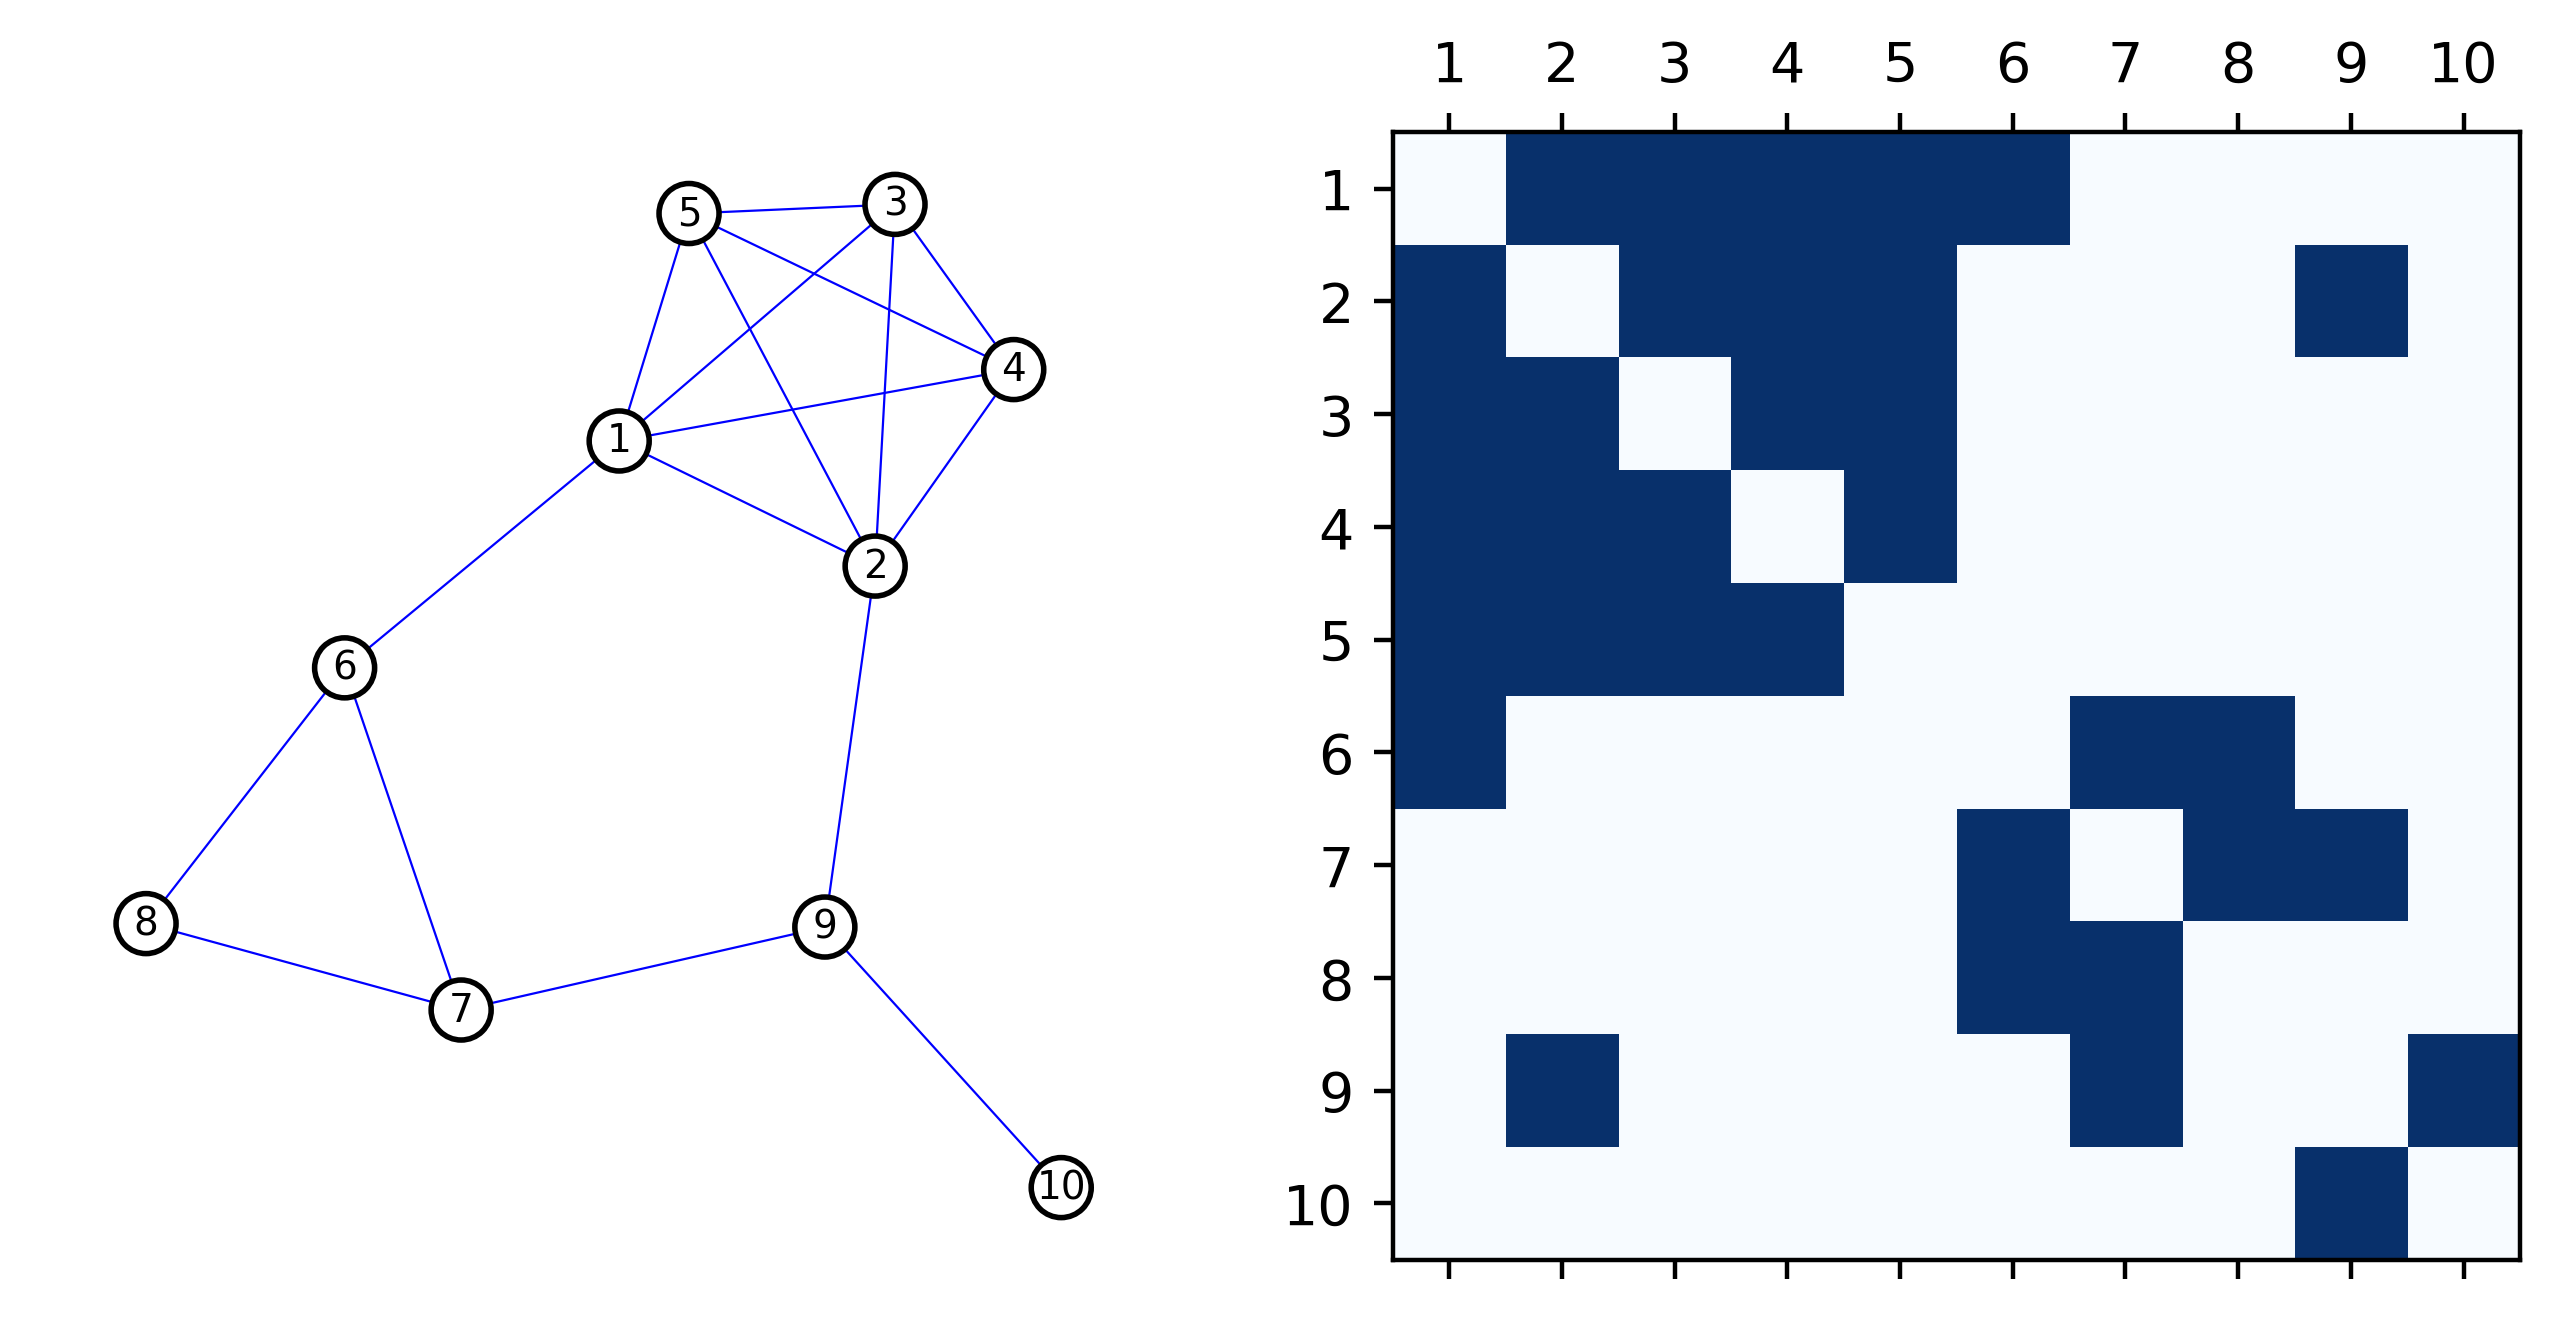

In [3]:
# visualización
f, axes = plt.subplots(1,2, figsize = (8,4), dpi = 400)
# Graph
gr.plot(g,target = axes[0], vertex_size = 60, vertex_color = '#ffffff',
        edge_color = '#0000ff',vertex_label = range(1,11),edge_width = 0.4,
       vertex_label_size = 7)
# Adjacency
axes[1].matshow(Y,cmap = 'Blues')
axes[1].set_xticks(range(10),range(1,11))
axes[1].set_yticks(range(10),range(1,11))
# 
plt.show()

In [4]:
# orden
g.vcount()

10

In [5]:
# tamaño
g.ecount()

17

In [6]:
# clan?
c1 = g.induced_subgraph(['6','7','8'])
c1.ecount() == m.comb(c1.vcount(),2)

True

In [7]:
# frecuencias de clanes
pd.Series([len(cl) for cl in g.cliques()]).value_counts(sort = False)

1    10
2    17
3    11
4     5
5     1
dtype: int64

Un **clan maximal** (*maximal clique*) es un clan que no se puede extender incluyendo algún otro vértice.

In [8]:
# clanes maximales (Aquí Python indexa desde cero)
g.maximal_cliques()

[(9, 8), (5, 6, 7), (5, 0), (6, 8), (8, 1), (0, 1, 4, 3, 2)]

Un **clan máximo** (*maximum clique*) es el clan maximal más grande.

El **número clan** (*clique number*) es el tamaño del clan máximo.

In [9]:
# clanes máximos (Aquí Python indexa desde cero)
g.largest_cliques()

[(0, 1, 4, 3, 2)]

In [10]:
# número clan
g.clique_number()

5

En la práctica, **clanes "grandes" son escasos**, ya que requieren que el grafo sea denso, pero las **redes reales comúnmente son dispersas** (*sparse*).


### 2.1 Ejemplo: Interacciones sociales

Red de **interacciones sociales** entre los miembros de un club de karate.

Estos datos fueron recolectados para **estudiar la fragmentación** que sufrió el club en dos clubes diferentes debido a una disputa entre el director y el administrador.

$y_{i,j} = 1$ si los miembros $i$ y $j$ tuvieron una **interacción social** en el club y $y_{i,j} = 0$ en otro caso.

Una descripción completa de los datos se puede encontrar [aquí](https://rdrr.io/cran/igraphdata/man/karate.html).

Disponible en el paquete `igraphdata` de R.

Zachary, W. W. (1977). **An information flow model for conflict and fission in small groups**. Journal of anthropological research, 33(4), 452-473.



In [11]:
# data
karate = gr.Graph.from_networkx(nx.karate_club_graph())
## Arreglar nombres
tmp_names = ['Actor '+str(i+1) for i in range(karate.vcount())]
tmp_names[0] = "Mr. Hi"
tmp_names[33] = "John A"
karate.vs['name'] = tmp_names
## Aquí el atributo Faction de R se llama club. El Actor 9 pertenece a la facción de
# Mr Hi en vez de la de John A. Cambiaremos esto último para que los resultados
# obtenidos aquí coincidan con los obtenidos en el Rmd.
karate.vs.select(name = 'Actor 9')['club'] = 'Officer'
Y = np.array(karate.get_adjacency())

In [12]:
# orden
karate.vcount()

34

In [13]:
# tamaño
karate.ecount()

78

In [14]:
# dirigida?
karate.is_directed()

False

In [15]:
# ponderada?
karate.is_weighted()

True

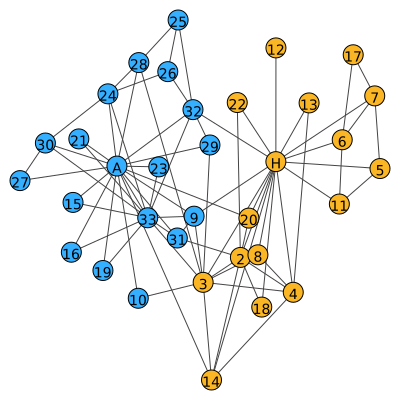

In [16]:
# visualización
viz_options = {
    'vertex_color' : ['#FAB624' if v['club'] == 'Mr. Hi' else '#35AFFF' for v in karate.vs],
    'vertex_label' : 'black',
    'vertex_frame_color' : 'black',
    'vertex_label' : ['H'] + list(range(2,34)) + ['A'],
    'layout' : 'dh'
}
gr.plot(karate,bbox = (400,400),**viz_options)

In [17]:
# cliques máximos
raw_output = karate.largest_cliques()
[[karate.vs['name'][v] for v in cl] for cl in raw_output]

[['Actor 2', 'Mr. Hi', 'Actor 4', 'Actor 3', 'Actor 8'],
 ['Actor 2', 'Mr. Hi', 'Actor 4', 'Actor 3', 'Actor 14']]

In [18]:
# número clan
karate.clique_number()

5

### 2.2 Ejemplo: Interacciones proteína-proteína

Red de **interacción de proteínas** de levadura. 

Las interacciones proteína-proteína prometen revelar aspectos del sistema regulatorio que subyace a la función celular.

Los nodos corresponden a proteínas y solo se consideran aquellas interacciones que tienen una confianza "moderada" y "alta". 

Una descripción completa de los datos se puede encontrar [aquí](http://www.nature.com/nature/journal/v417/n6887/suppinfo/nature750.html).

Disponible en el paquete `igraphdata` de R.

Von Mering, C., Krause, R., Snel, B., Cornell, M., Oliver, S. G., Fields, S., & Bork, P. (2002). **Comparative assessment of large-scale data sets of protein–protein interactions.** Nature, 417(6887), 399-403.

<p align = "center">
    <img src="04_yeast.png" width = 500\>
</p>


In [19]:
# datos
yeast_edges_df = pd.read_csv("yeast_edges.csv")
yeast_vertex_df = pd.read_csv("yeast_vertex.csv")
yeast = gr.Graph.DataFrame(yeast_edges_df,
                           use_vids = False, 
                           directed = False,
                           vertices = yeast_vertex_df)

In [20]:
# orden
yeast.vcount()

2617

In [21]:
# tamaño
yeast.ecount()

11855

In [22]:
# dirigida?
yeast.is_directed()

False

In [23]:
# poderada?
yeast.is_weighted()

False

In [24]:
# número clan
yeast.clique_number()

23

El número clan es relativamente pequeño (incluso para redes "grandes").


## 3. Díadas y tríadas

Otras cantidades de interés son las **díadas** y las **tríadas**.

¿Cuáles son los estados diádicos no dirigidos y dirigidos? 

¿Y los triádicos?

**Estados triádicos no dirigidos** (*undirected triadic motifs*):

<p align = "center">
    <img src="05_undirected_triadic_motifs.jpg" width = 500\>
</p>

**Estados triádicos dirigidos** (*directed triadic motifs*):

<p align = "center">
    <img src="05_directed_triadic_motifs.jpg" width = 500\>
</p>



Davis, J.A. and Leinhardt, S. (1972). **The Structure of Positive Interpersonal Relations in Small Groups.** In J. Berger (Ed.), Sociological Theories in Progress, Volume 2, 218-251. Boston: Houghton Mifflin.

Un **censo de los estados diádicos** o **triádicos** proporciona una medida de la conectividad de una red.


### 3.1 Ejemplo: Blogs de SIDA

Red de **blogs de SIDA, pacientes y sus redes de apoyo**. 

Un enlace dirigido de un blog a otro indica que el primero tiene un enlace al segundo en su página web. 

Una descripción completa de los datos se puede encontrar [aquí](https://rdrr.io/cran/sand/man/aidsblog.html).

Disponible en el paquete `sand` de R.

Miller, H. J. (2007). **Societies and cities in the age of instant access**. In Societies and cities in the age of instant access (pp. 3-28). Springer, Dordrecht.



In [25]:
# datos (importados desde el paquete sand de R)
aidsblog = gr.Graph.Read_Adjacency('aidsblog_adjacency.csv',sep = ',')

In [26]:
# orden
aidsblog.vcount()

146

In [27]:
# tamaño
aidsblog.ecount()

187

In [28]:
# dirigida?
aidsblog.is_directed()

True

In [29]:
# ponderada?
aidsblog.is_weighted()

False

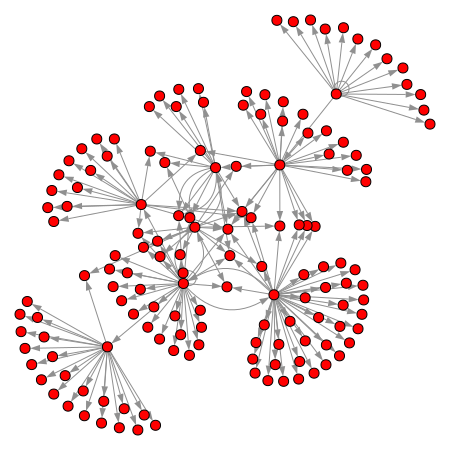

In [30]:
# vidualización
gr.plot(aidsblog, layout = 'kk',bbox = (450,450),
        vertex_size = 10,edge_color = '#909090',
        edge_arrow_size = 0.7)

In [31]:
# simple?
aidsblog.is_simple()

False

In [32]:
aidsblog.dyad_census().as_dict()

{'mutual': 3, 'asymmetric': 177, 'null': 10405}

In [33]:
aidsblog.triad_census().count(0)

5

In [34]:
# Censo de estados triádicos:
 # - C{003} -- the empty graph
 # - C{012} -- a graph with a single directed edge (C{A --> B, C})
 # - C{102} -- a graph with a single mutual edge (C{A <-> B, C})
 # - C{021D} -- the binary out-tree (C{A <-- B --> C})
 # - C{021U} -- the binary in-tree (C{A --> B <-- C})
 # - C{021C} -- the directed line (C{A --> B --> C})
 # - C{111D} -- C{A <-> B <-- C}
 # - C{111U} -- C{A <-> B --> C}
 # - C{030T} -- C{A --> B <-- C, A --> C}
 # - C{030C} -- C{A <-- B <-- C, A --> C}
 # - C{201} -- C{A <-> B <-> C}
 # - C{120D} -- C{A <-- B --> C, A <-> C}
 # - C{120U} -- C{A --> B <-- C, A <-> C}
 # - C{120C} -- C{A --> B --> C, A <-> C}
 # - C{210C} -- C{A --> B <-> C, A <-> C}
 # - C{300} -- the complete graph (C{A <-> B <-> C, A <-> C})
# Esta información se puede consultar en help(aidsblog.triad_census())
aidsblog.triad_census()

TriadCensus((484621, 20588, 429, 2195, 39, 74, 1, 112, 4, 0, 2, 0, 15, 0, 0, 0))

In [35]:
tr_census = aidsblog.triad_census()
tr_census['111U'] # A <-> B --> C

112

La gran mayoría de los estados son nulos y de los que no lo son, casi todos son asimétricos, lo que indica una unilateralidad (asimetría) preponderante en la manera en que los blogs se referencian.


## 4. Densidad

La **densidad** (*density*) de un grafo se define como la frecuencia relativa de las aristas observadas respecto al potencial de aristas.

Para un subgrafo $H=(V_H,E_H)$ del grafo $G=(V,E)$, la densidad se calcula como
$$
\textsf{den(H)}=\frac{|E_H|}{|V_H|(|V_H|-1)/2}\,.
$$
En el caso de un **digrafo** el denominador debe ser $|V_H|(|V_H|-1)$.

La densidad asume valores entre 0 y 1 y se puede interpretar como una medida de qué tan cerca se encuentra $H$ de ser un clan.


### 4.1 Ejemplo: Interacciones sociales


In [36]:
# densidad
n = karate.vcount()
karate.ecount()/(n*(n - 1)/2)

0.13903743315508021

In [37]:
karate.density()

0.13903743315508021

In [38]:
np.mean(Y[np.tril_indices(n,-1)])

0.13903743315508021

In [39]:
np.mean(Y[np.triu_indices(n,1)])

0.13903743315508021

In [40]:
# ego networks
g_1 = karate.induced_subgraph(karate.neighborhood(0))
g_34 = karate.induced_subgraph(karate.neighborhood(33))

In [41]:
# densidades
[g.density() for g in (g_1,g_34)]

[0.25, 0.2091503267973856]

## 5. Transitividad global

Una **tripla** está constituida por tres nodos que están conectados por dos (tripla abierta) o tres (tripla cerrada) aristas.

La **transitividad** (*transitivity*) de un grafo se cuantifica por medio del **coeficiente de agrupamiento** (*clustering coeffitient*) que se calcula como
$$
\textsf{cl} (G) =\frac{\text{no. triplas cerradas}}{\text{no. triplas}} =\frac{3\times \text{no. triángulos}}{\text{no. triplas}} = \frac{3\tau_\triangle(G)}{\tau_3(G)}\,,
$$
donde $\tau_\triangle(G)$ es el **número de triángulos** de $G$ y $\tau_3(G)$ es el **número de triplas**.

El coeficiente de agrupamiento es una **medida de agrupamiento global** que caracteriza la propensión con la que las triplas forman triángulos.


### 5.1 Ejemplo

In [42]:
h = gr.Graph.Formula("1:2:3 -- 1:2:3,  1 -- 4").simplify()

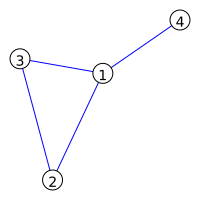

In [43]:
# visualización
gr.plot(h,bbox = (200,200),vertex_color = 'white',vertex_label = h.vs['name'],
       edge_color = 'blue')

In [44]:
# número de triángulos por vértice
nx.triangles(h.to_networkx()).values() # Se usa NetworkX porque igraph no tiene la funcionalidad

dict_values([1, 1, 1, 0])

In [45]:
# vértices que son parte de un triángulo
h.cliques(3,3) # igraph

[(0, 1, 2)]

In [46]:
# vértices que son parte de un triángulo
list(nx.community.k_clique_communities(h.to_networkx(),3)) # NetworkX

[frozenset({0, 1, 2})]

In [47]:
# conteos de estados triádicos
mot = h.motifs_randesu() # size = 3 por defecto
mot

[nan, nan, 2, 1]

In [48]:
# transitividad
3*mot[3]/(mot[2] + 3*mot[3])

0.6

In [49]:
h.transitivity_undirected()

0.6

### 5.2 Ejemplo

In [50]:
g = gr.Graph.Formula("1:2:3:4:5 -- 1:2:3:4:5, 6:7:8 -- 6:7:8, 6 -- 1, 9 -- 2:7:10").simplify()

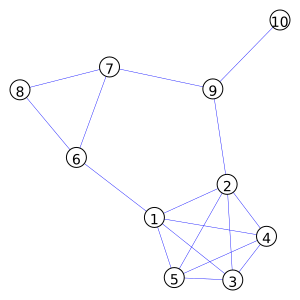

In [51]:
gr.plot(g, vertex_size = 20, vertex_color = 'white',bbox = (300,300),
        edge_color = 'blue',vertex_label = range(1,11),edge_width = 0.4)

In [52]:
# número de triángulos por vértice
nx.triangles(g.to_networkx()).values()

dict_values([6, 6, 6, 6, 6, 1, 1, 1, 0, 0])

In [53]:
# vértices que son parte de un triángulo
np.sort([v for tr in g.cliques(3,3) for v in tr])

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 5, 6, 7])

In [54]:
# conteos de estados triádicos
mot = g.motifs_randesu() # size = 3 por defecto
mot

[nan, nan, 15, 11]

In [55]:
# transitividad
3*mot[3]/(mot[2] + 3*mot[3])

0.6875

In [56]:
g.transitivity_undirected()

0.6875

## 6. Transitividad local

El **coeficiente de agrupamiento** del vértice $v\in V$ se define teniendo en cuenta la incidencia de $v$ en las aristas que conforman las triplas:
$$
\textsf{cl}(v) = \frac{\text{no. triplas cerradas que incluyen a $v$}}{k_v(k_v-1)/2}\,,
$$
donde $k_v$ es el grado del nodo $v$.

El coeficiente de agrupamiento de un vértice es una **medida de agrupamiento local** que cuantifica qué tan cerca están los vecinos del vértice de ser un clan.

Alternativamente, el  **coeficiente de agrupamiento global** también se puede definir como el promedio de los coeficientes de agrupamiento locales de todos los vértices:
$$
\textsf{cl} (G) = \frac{1}{|V|}\sum_{v\in V} \textsf{cl}(v)\,.
$$

### 6.1 Ejemplo

In [57]:
g = gr.Graph.Formula("1:2:3:4:5 -- 1:2:3:4:5, 6:7:8 -- 6:7:8, 6 -- 1, 9 -- 2:7:10").simplify()

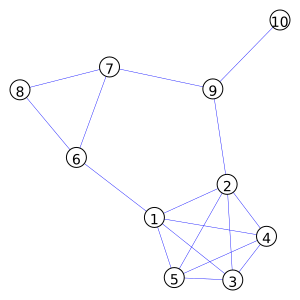

In [58]:
gr.plot(g, vertex_size = 20, vertex_color = 'white',bbox = (300,300),
        edge_color = 'blue',vertex_label = range(1,11),edge_width = 0.4)

In [59]:
# intransitividad local del vértice 1
nx.triangles(g.to_networkx()).values()

dict_values([6, 6, 6, 6, 6, 1, 1, 1, 0, 0])

In [60]:
g.degree()

[5, 5, 4, 4, 4, 3, 3, 2, 3, 1]

In [61]:
6/(5*(5-1)/2)

0.6

In [62]:
g.transitivity_local_undirected()

[0.6,
 0.6,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.0,
 nan]

In [63]:
# transitividad global alternativa
np.nanmean(g.transitivity_local_undirected())

0.6518518518518519

### 6.2 Interacciones sociales

In [64]:
# transitividad
karate.transitivity_undirected()

0.2556818181818182

In [65]:
# intransitividad local
karate.transitivity_local_undirected([0,33])

[0.15, 0.11029411764705882]

## 7. Reciprocidad

Un concepto exclusivo de los dígrafos es la **reciprocidad**, i.e., la propensión con la que hay reciprocidad de aristas en la red. 

Las frecuencias se pueden calcular respecto al número de díadas o de aristas:
$$
\textsf{rec}(G) = \frac{\text{no. aristas reciprocas}}{\text{no. aristas}}\,,
$$
o alternativamente,
$$
\textsf{rec}(G) = \frac{\text{no. diadas reciprocas}}{\text{no. diadas no reciprocas}}\,.
$$


### 7.1 Ejemplo: Blogs de SIDA


In [66]:
# reciprocidad (aristas)
aidsblog.reciprocity()

0.032432432432432434

In [67]:
# reciprocidad (díadas)
aidsblog.reciprocity(mode = 'ratio')

0.016483516483516484

## 8. Conectividad

Comúnmente una de las componentes conectadas de un grafo $G=(V,E)$ domina a las demás en magnitud. Tal componente se denomina **componente gigante** (*giant component*).

En la práctica, la atención se restringe a la componente gigante para llevar a cabo tanto el análisis como el modelamiento.

Un grafo $G=(V,E)$ se llama **$k$-conectado** (*$k$-connected*) si $|V|>k$ y la remoción de cualquier subconjunto de vértices $X \subset V$ tal que $|X| < k$ da como resultado un subgrafo que continua estando conectado.

La **conectividad nodal** de un grafo $G=(V,E)$ corresponde al entero más grande $k$ tal que $G$ es $k$-conectado. 

Alternativamente, también se puede definir como el número mínimo de nodos que deben eliminarse para desconectar el grafo.

Un vértice que la ser removido desconecta el grafo se denomina **vértice de corte** (*cut vertex*) o **punto de articulación** (*articulation point*). 

La identificación de tales vértices proporciona una idea de dónde es vulnerable una red.


### 8.1 Ejemplo

In [68]:
# datos 
f = gr.Graph.Formula("1:2:3 -- 1:2:3, 4 -- 1:5").simplify()

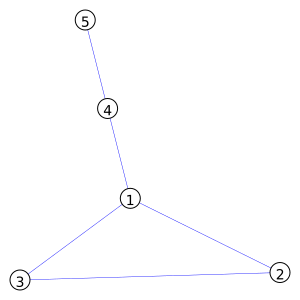

In [69]:
# visualización
gr.plot(f, vertex_size = 20, vertex_color = 'white',bbox = (300,300),
        edge_color = 'blue',vertex_label = range(1,6),edge_width = 0.4)

In [70]:
# red conectada?
f.is_connected()

True

In [71]:
# k-conectividad
f.vertex_connectivity()

1

In [72]:
f.edge_connectivity()

1

In [73]:
# puntos de articulación
f.articulation_points() # Python indexa desde cero

[0, 3]

### 8.2 Ejemplo: Interacciones proteína-proteína

In [74]:
# red conectada?
yeast.is_connected()

False

In [75]:
# componentes
componentes = yeast.decompose()
len(componentes)

92

In [76]:
pd.Series([comp.vcount() for comp in componentes]).value_counts().sort_index()

2       63
3       13
4        5
5        6
6        1
7        3
2375     1
dtype: int64

In [77]:
# tamaño de la componte gigante
max([comp.vcount() for comp in componentes])

2375

In [78]:
max([comp.vcount() for comp in componentes])/yeast.vcount()

0.9075277034772641

In [79]:
# componente gigante
yeast_gc = yeast.decompose()[0]
# vértice-conectividad
yeast_gc.vertex_connectivity()

1

In [80]:
# arista-conectividad
yeast_gc.edge_connectivity()

1

In [81]:
# puntos de articulación
yeast_cv = yeast_gc.articulation_points()
len(yeast_cv)

350

In [82]:
len(yeast_cv)/yeast_gc.vcount()

0.14736842105263157

Se requiere la eliminación de un solo vértice o una sola arista para dividir el componente gigante en componentes adicionales.

Aproximadamente el 15\% de los vértices son puntos de articulación.


## Referencias

<p align="center">
<img width="400px" src="01_cover_KC.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Luke.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Menczer.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_AK.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Newman.jpg">
</p>